## Customer Churn Analysis

**Problem Statement:**

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# to import dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# to check column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# to check basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* The dataset have 7042 rows and 21 columns. 
* There are no null values in the dataset.
* Most of the columns are of object datatype, 2-int64 and 1- float datatype
* TotalCharges column represent total bill amount, which is suppose to be float but given here as object.

In [5]:
# to convert TotalCharges from object to float type data
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [11]:
# to Drop customer ID column
df = df.drop(["customerID"],axis=1)

Customer ID column have all unique values.It will not contribute in model making so i can drop this column.

In [12]:
# to check the info after converting TotalCharges from object to float type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
# to check unique values of each column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [15]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Male      3555
Female    3488
Name: gender, dtype: int64
****************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
****************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
****************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
****************************************
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
****************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
****************************************
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
****************************************
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
****************************************
No                     3498
Yes            

The value counts of each column shows some duplicate entries in MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So,have to replace them.

I have replaced with No for No internet Service.If no internet service then there is no MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So i will replace all these entries with 'No'.

In [16]:
#Grouping entries of MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies column

#Grouping in MultipleLines column
df["MultipleLines"].replace("No phone service","No",inplace=True)

#Grouping in OnlineSecurity column
df["OnlineSecurity"].replace("No internet service","No",inplace=True)

#Grouping in OnlineBackup column
df["OnlineBackup"].replace("No internet service","No",inplace=True)

#Grouping in DeviceProtection column
df["DeviceProtection"].replace("No internet service","No",inplace=True)

#Grouping in TechSupport column
df["TechSupport"].replace("No internet service","No",inplace=True)

#Grouping in StreamingTV column
df["StreamingTV"].replace("No internet service","No",inplace=True)

#Grouping in StreamingMovies column
df["StreamingMovies"].replace("No internet service","No",inplace=True)

In [17]:
# to Check null values in the dataset
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are null values in TotalCharges after changeing the data type.

In [18]:
#Replacing null values of TotalCharges column with it's mean
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [19]:
# to Check null values agian
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
# to Check statistical description of the data set
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


There is some difference between the mean and 2nd quantile value which means there are some outliers.

**Visualization:**

In [22]:
# to check for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [23]:
# to check for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


<function matplotlib.pyplot.show(close=None, block=None)>

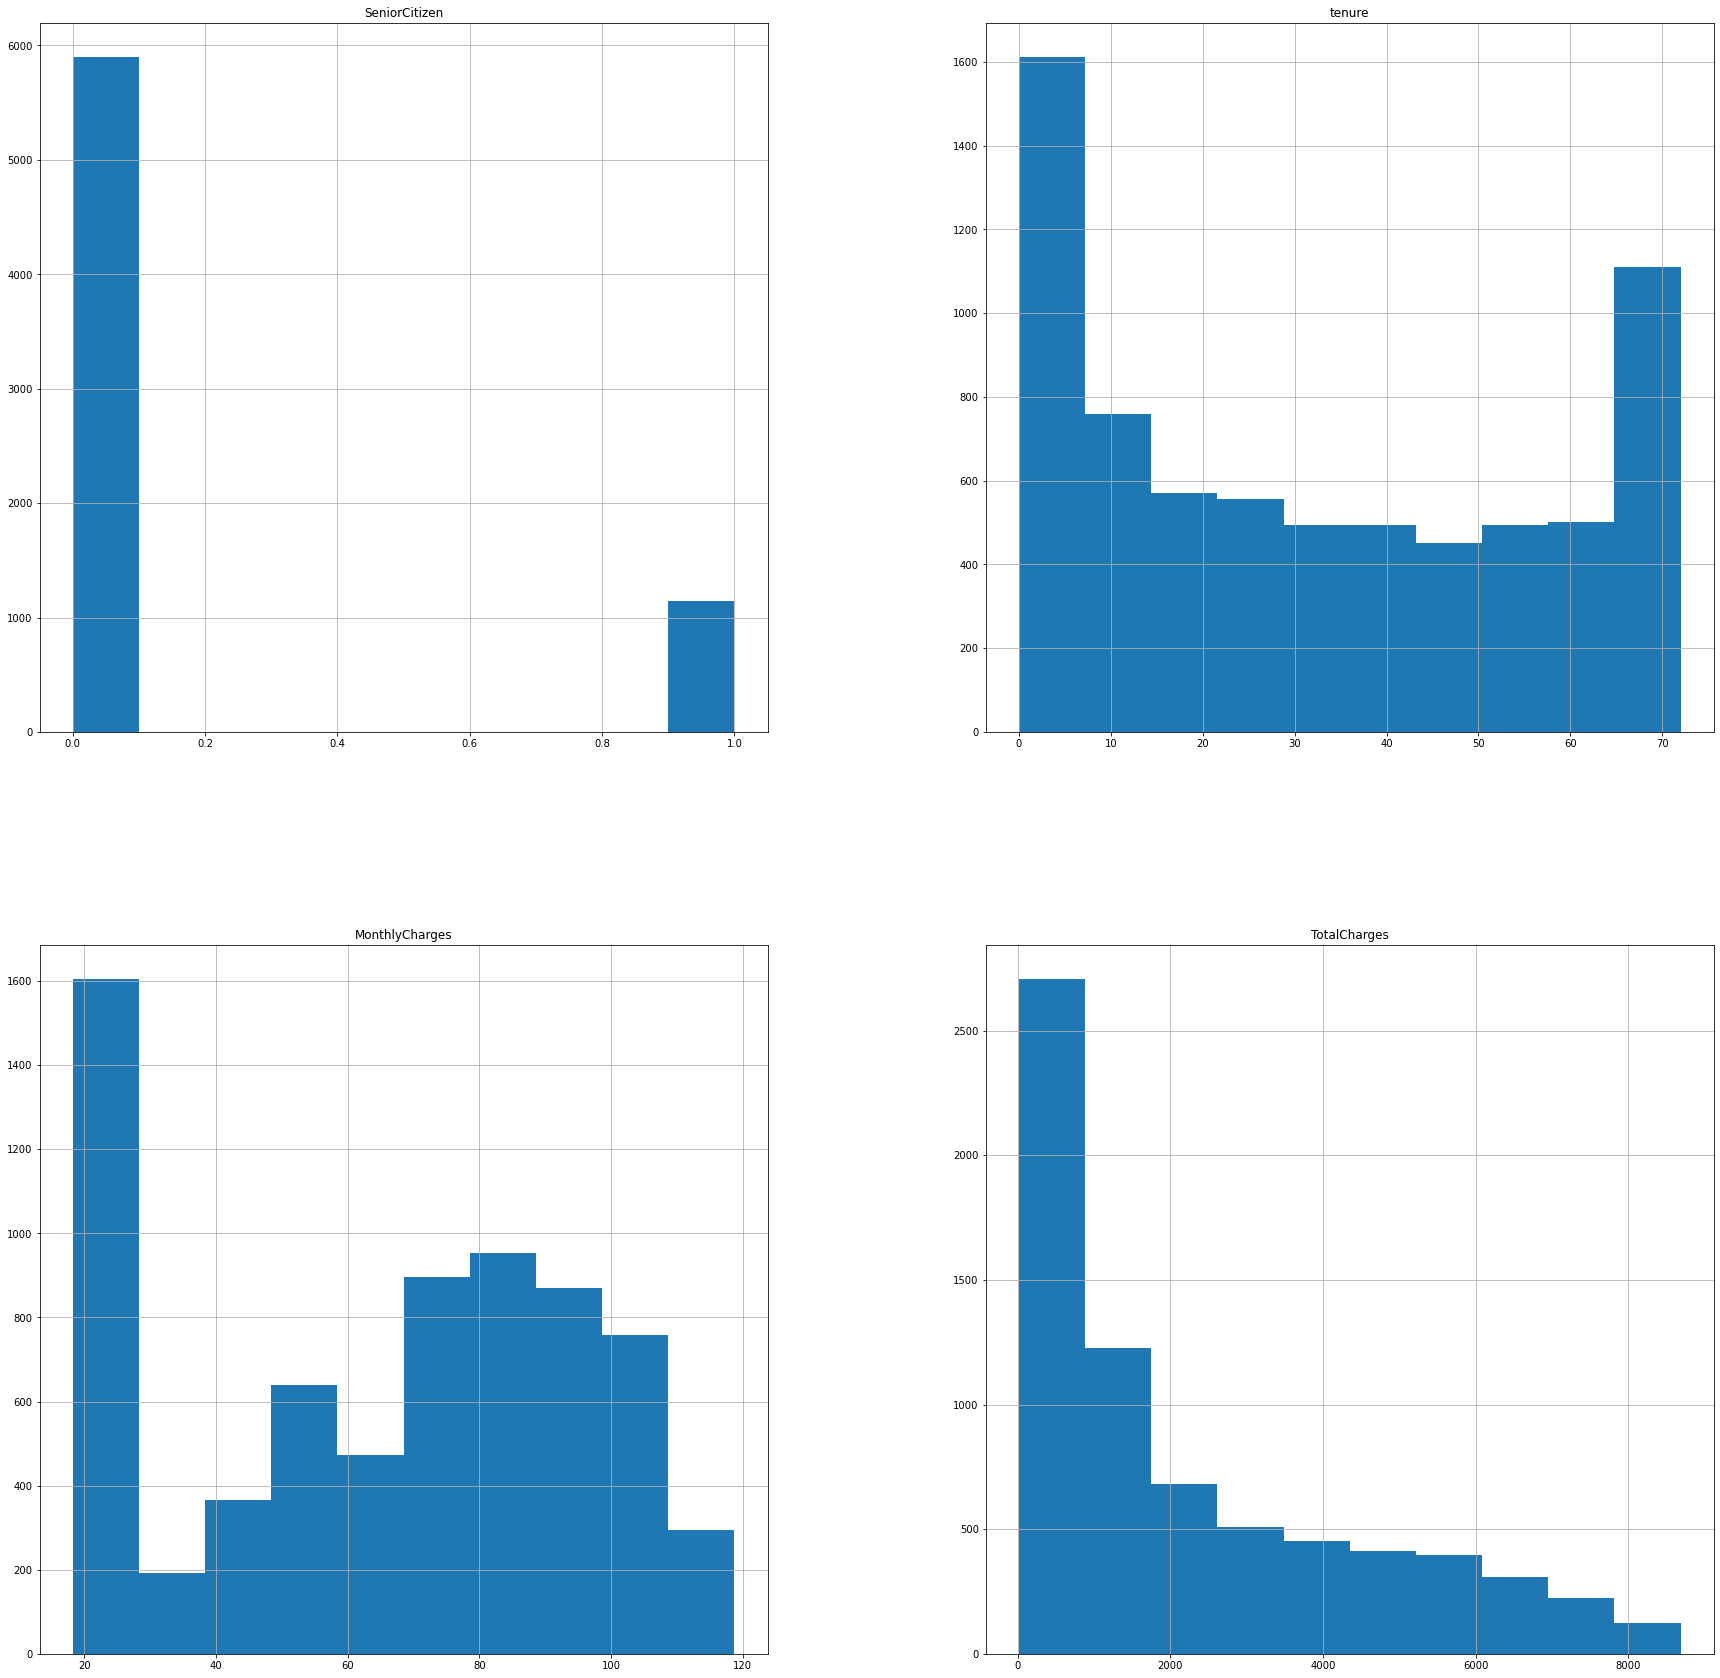

In [26]:
df.hist(figsize=(30,30))
plt.show

* skewness is present in TotalCharges
* Most of the monthly charges are around 20.

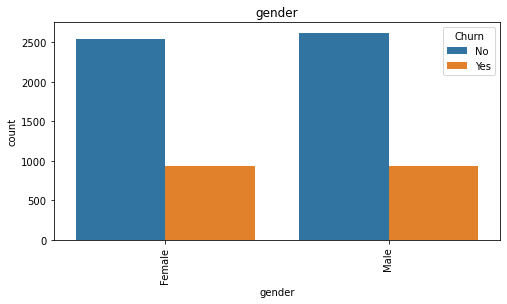

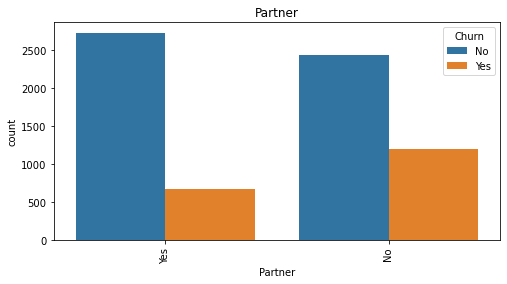

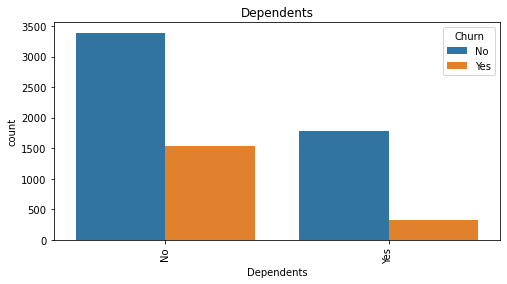

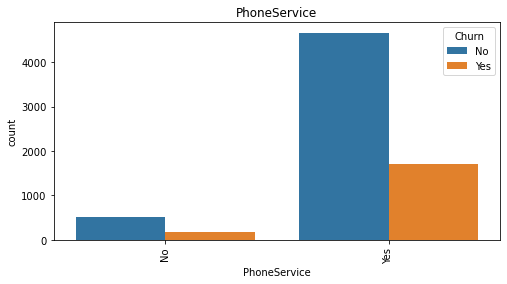

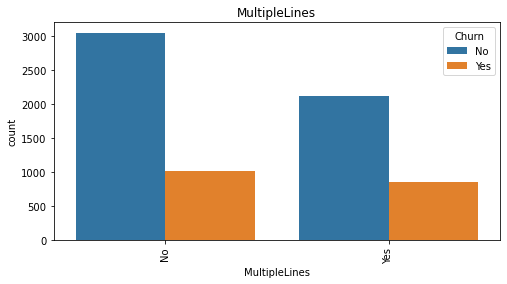

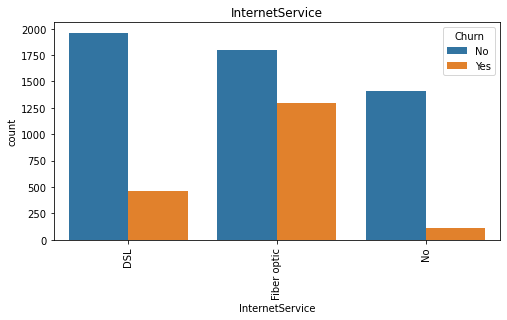

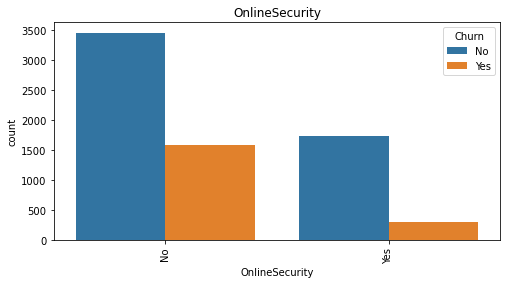

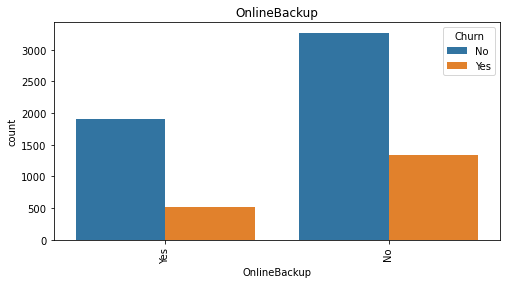

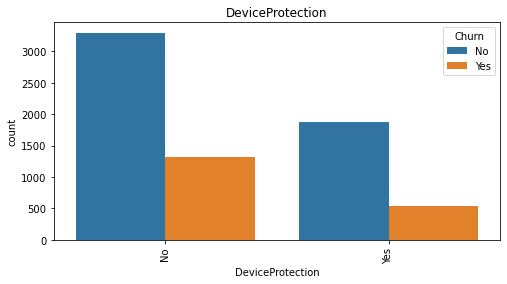

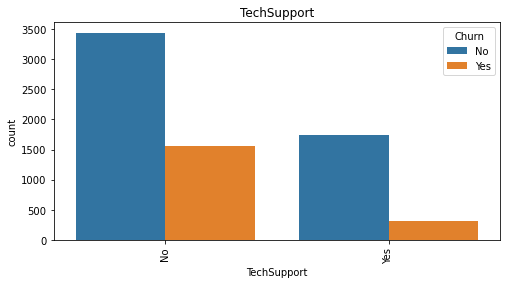

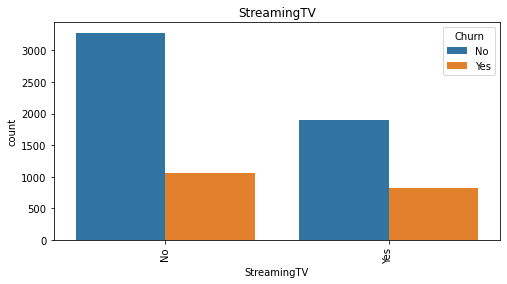

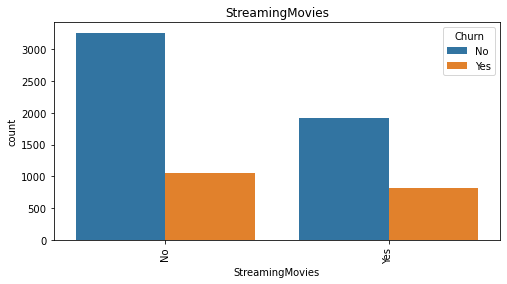

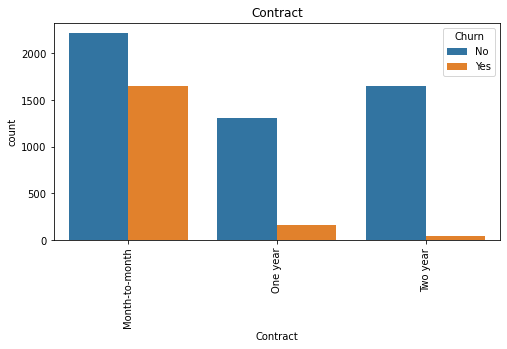

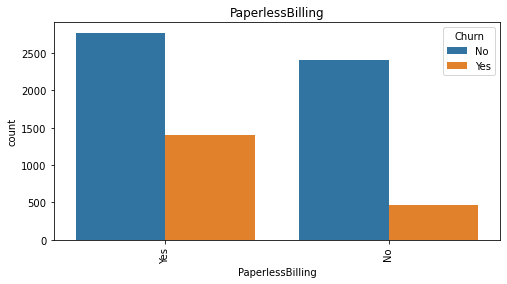

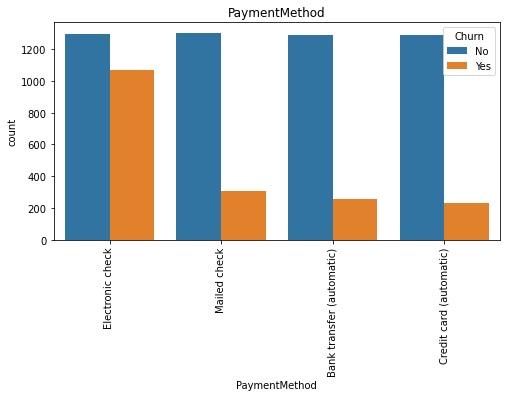

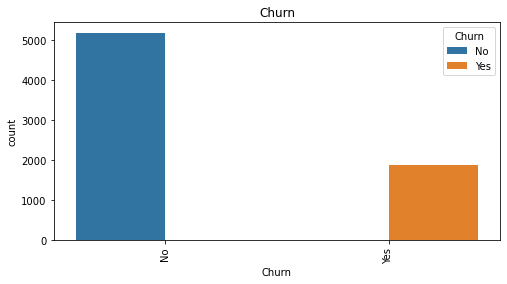

In [28]:
#Distribution plot for all categorical columns
for i in df[categorical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.countplot(x=df[i], hue ='Churn',data=df)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

* Most of the customers are with No Dependents.
* Most of customers are with PhoneService.
*Most of the customers uses Fiber optic InternetService.And very less with no InternetService.

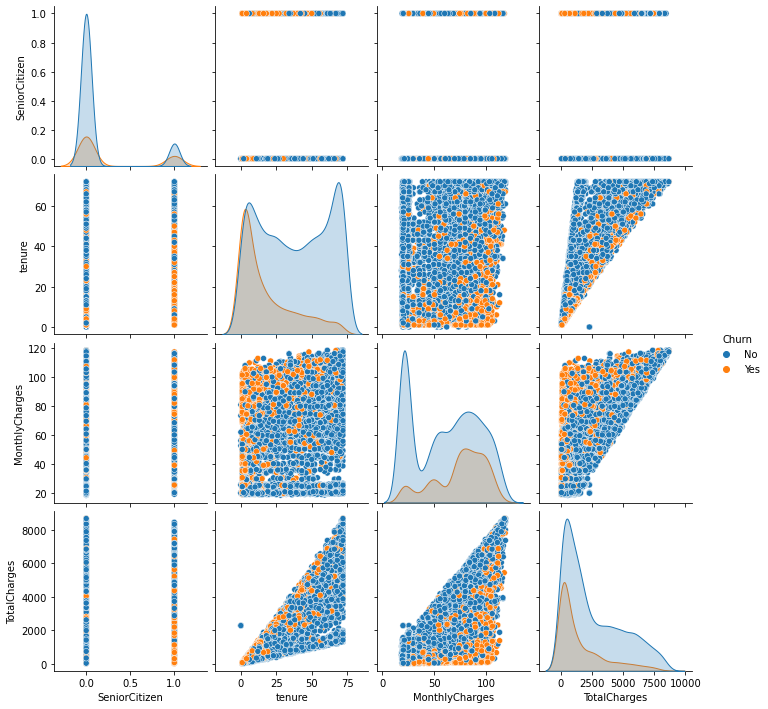

In [29]:
#pair ploting for df
sns.pairplot(df,hue="Churn")

The pair plot for having Churn as target.There are some outliers present in the dataset.

**Data Cleaning:**

**Checking for outliers:**

SeniorCitizen        AxesSubplot(0.125,0.749828;0.133621x0.130172)
tenure            AxesSubplot(0.285345,0.749828;0.133621x0.130172)
MonthlyCharges     AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCharges      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
dtype: object

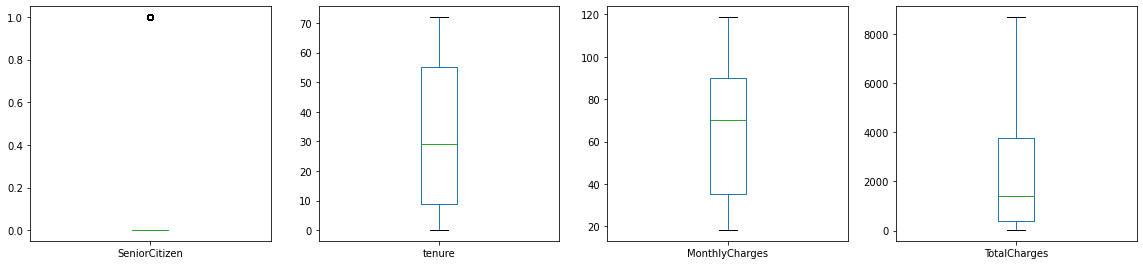

In [30]:
# to find out outliers in the dataset
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(25,25))

**Checking for skewness:**

In [31]:
#Checking for skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

skewness in SeniorCitizen and TotalCharges.But SeniorCitizen is a categorical column so no need to remove skewness from this column. Have to remove skewness from TotalCharges.

**Removing skewness**

In [32]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i am removing the skewness.

In [33]:
df[['TotalCharges']] = scaler.fit_transform(df[['TotalCharges']].values)

In [34]:
#Checking skewness again
df[['TotalCharges']].skew()

TotalCharges   -0.144899
dtype: float64

In [35]:
# Separating categorical columns in df
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [36]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,0.295688,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,1.567097,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968,1.0


In [38]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,-0.171026,0.490434,0.465731,0.040102
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,0.011124,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.403935,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,-0.170898,0.441780,0.483612,-0.082255


<AxesSubplot:>

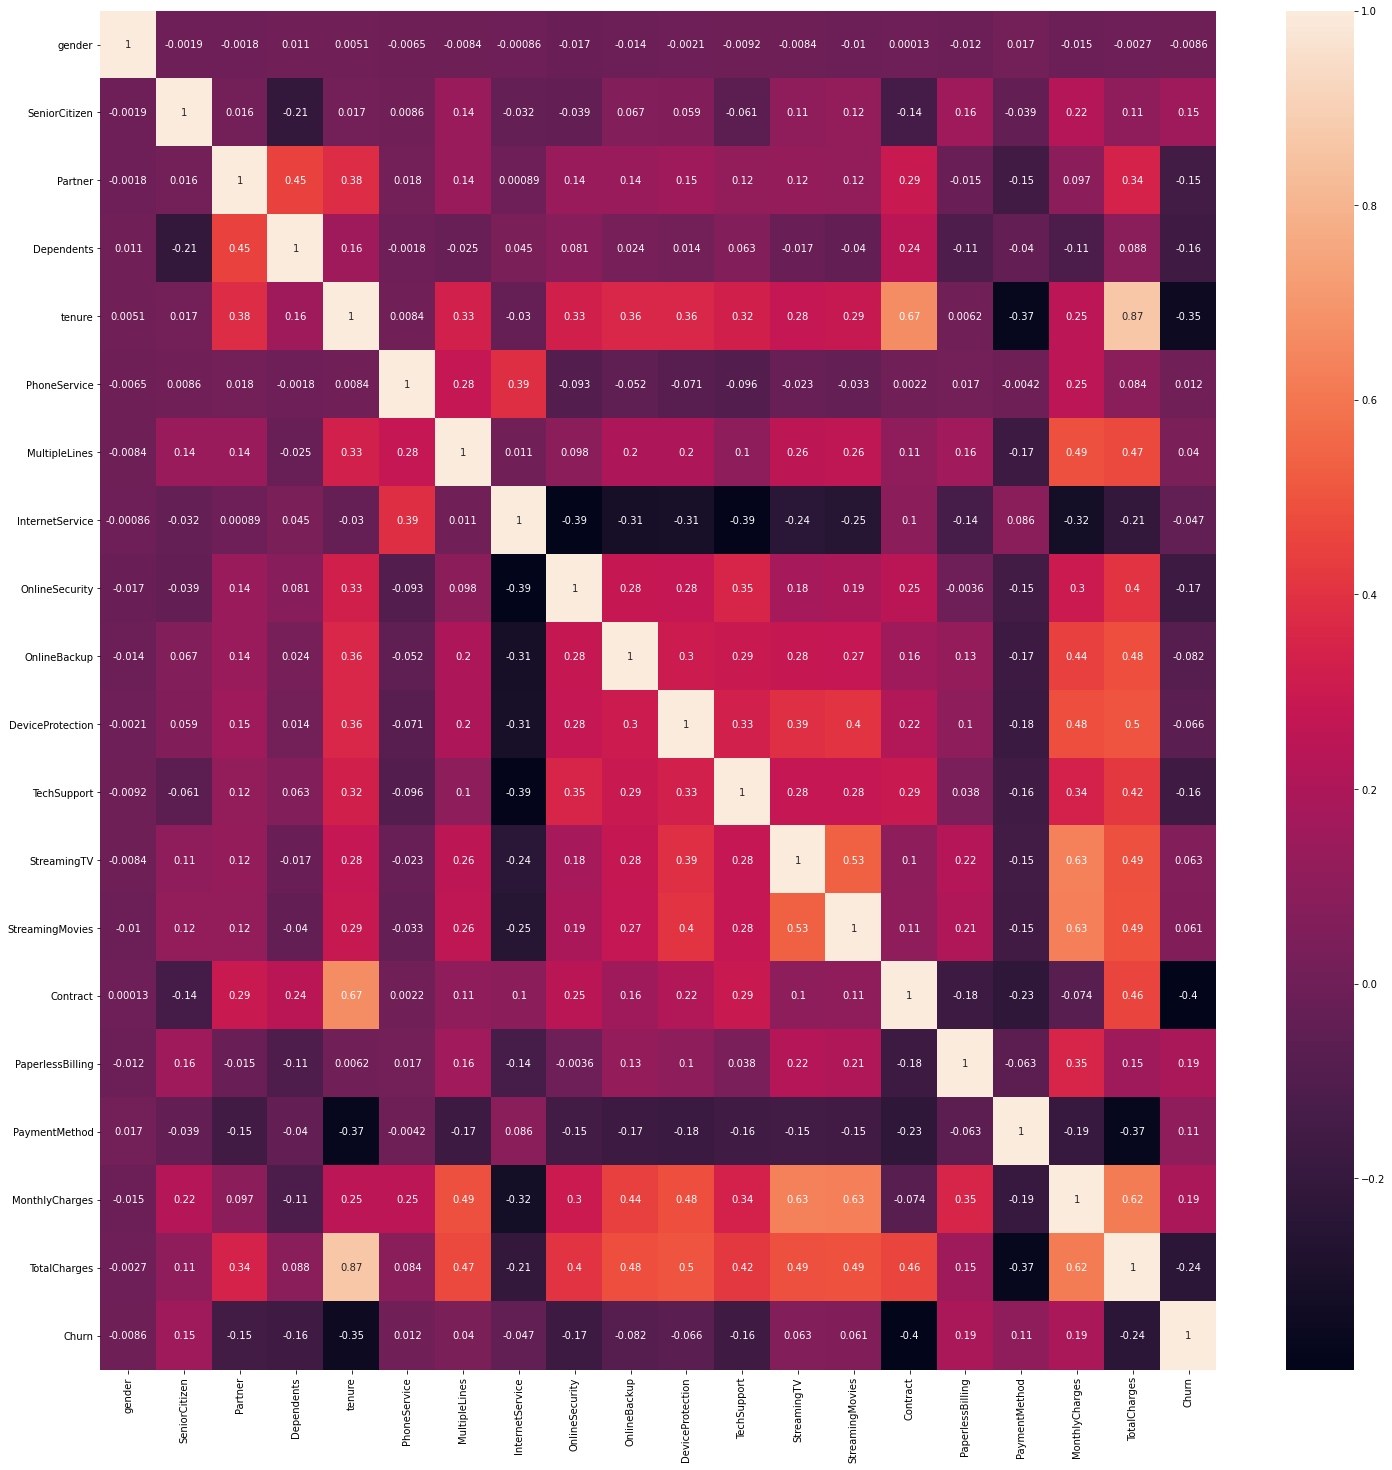

In [40]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),color ='k',annot=True)

By looking into the heat map i can say that:

* There is a multicolinearity issue between tenure and TotalCharges,Contract and tenure.
* With target gender is very less correlated.
* To get better insight on target correlation with other features let me plot bar plot of target correlation.

**Separating features and label:**

In [41]:
x = df.drop("Churn",axis=1)
y = df["Churn"]

**Scaling the data using standard scaler:**

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [43]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-1.183234,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,-1.183234,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.79607,0.371271,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-1.183234,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,-1.183234,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.79607,0.371271,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,0.172250,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,0.398558,0.197365,-1.250118


**Checking multicolinearity using VIF:**

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001700,gender
1,1.149699,SeniorCitizen
2,1.463080,Partner
3,1.384360,Dependents
4,10.690330,tenure
5,1.712289,PhoneService
6,1.546815,MultipleLines
7,1.909515,InternetService
8,1.471226,OnlineSecurity
9,1.473860,OnlineBackup


In [45]:
#Droping highly VIF columns
X = X.drop(["TotalCharges"],axis=1)

In [46]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001700,gender
1,1.149607,SeniorCitizen
2,1.460871,Partner
3,1.382066,Dependents
4,2.754518,tenure
5,1.712012,PhoneService
6,1.538487,MultipleLines
7,1.897435,InternetService
8,1.464039,OnlineSecurity
9,1.469031,OnlineBackup


Now the multicolinearity issue is solved.All the VIF values are below 10 it is acceptable.

**Balancing the target variable using oversampling:**

In [47]:
#Checking the value count of target column
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [49]:
# Checking the value counts again
y.value_counts()

1.0    5174
0.0    5174
Name: Churn, dtype: int64

**Finding Best Random State and Accuracy:**

In [50]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8640901771336554  on Random_state  110


In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [53]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

**i) RandomForestClassifier:**

In [54]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8628019323671497
Confusion Matrix: [[1379  210]
 [ 216 1300]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1589
         1.0       0.86      0.86      0.86      1516

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



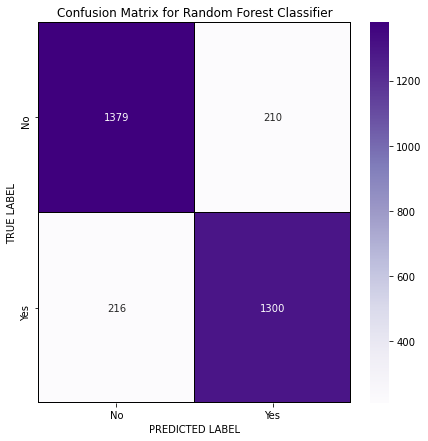

In [55]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

**ii) ExtraTreeClassifier:**

In [56]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)
predet=ETC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predet))
print('Confusion Matrix:',confusion_matrix(y_test, predet))
print(classification_report(y_test,predet))

Accuracy Score: 0.8679549114331723
Confusion Matrix: [[1376  213]
 [ 197 1319]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1589
         1.0       0.86      0.87      0.87      1516

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



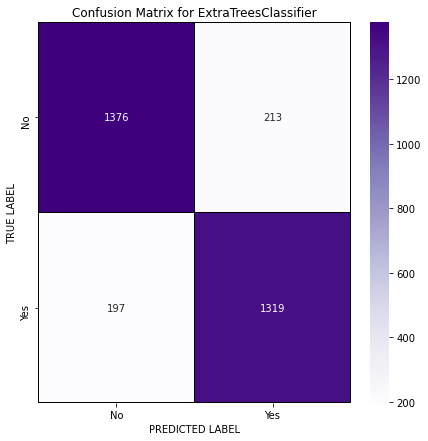

In [57]:
cm = confusion_matrix(y_test, predet)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for ExtraTreesClassifier')
plt.show()

**iii) Gradient Boosting Classifier:**

In [58]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8579710144927536
Confusion Matrix: [[1326  263]
 [ 178 1338]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      1589
         1.0       0.84      0.88      0.86      1516

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



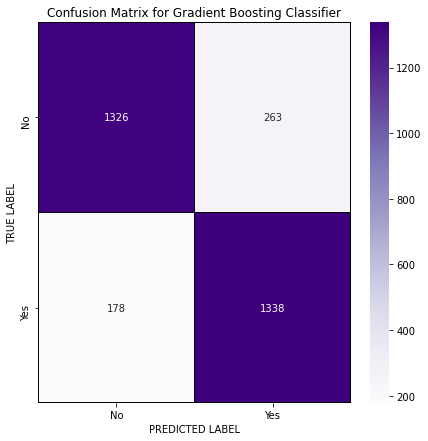

In [59]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


**v) SupportVectorClassifier:**

In [60]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.81256038647343
Confusion Matrix: [[1234  355]
 [ 227 1289]]
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      1589
         1.0       0.78      0.85      0.82      1516

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.82      0.81      0.81      3105



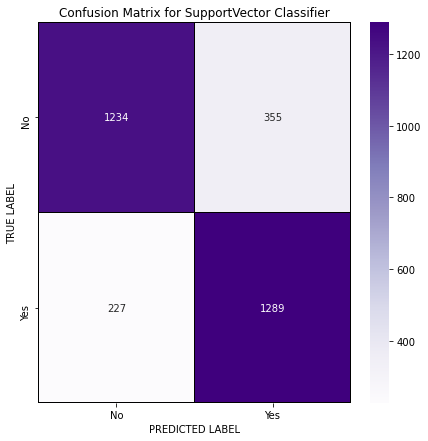

In [61]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SupportVector Classifier')
plt.show()

**Cross validation scores:**

In [62]:
#Importing library
from sklearn.model_selection import cross_val_score

In [63]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8505131887093347


In [64]:
# cv score for Extra Trees Classifier
print(cross_val_score(ETC,X,y,cv=5).mean())

0.8654887539313958


In [65]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

0.836983489888695


In [66]:
# cv score for Support Vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.8016094031283053


 cross validation score i found ExtraTreesClassifier as best model.

**Hyper Parameter tuning:**

In [67]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [68]:
parameter = {'criterion':['gini','entropy'],
             'random_state': [10,100,1000],
             'n_jobs':[-2,-1,1,2],
             'n_estimators':[100,200,300,400],
             'max_depth': [0,10,20,30]}

In [69]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)

In [70]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 30],
                         'n_estimators': [100, 200, 300, 400],
                         'n_jobs': [-2, -1, 1, 2],
                         'random_state': [10, 100, 1000]})

In [71]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 400,
 'n_jobs': -2,
 'random_state': 10}

In [72]:
Churn_mod=ExtraTreesClassifier(criterion='gini', max_depth=20,n_estimators=200, n_jobs=-2, random_state=10)
Churn_mod.fit(X_train,y_train)
pred=Churn_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 87.7938808373591
Confusion matrix: [[1361  228]
 [ 151 1365]]
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      1589
         1.0       0.86      0.90      0.88      1516

    accuracy                           0.88      3105
   macro avg       0.88      0.88      0.88      3105
weighted avg       0.88      0.88      0.88      3105



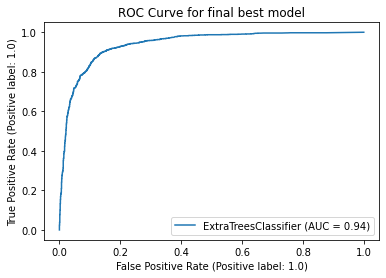

In [73]:
from sklearn.metrics import accuracy_score,plot_roc_curve
#Ploting ROC curve for final best model
plot_roc_curve(Churn_mod, X_test, y_test)
plt.title('ROC Curve for final best model')
plt.show()

**Final model has 94% accuracy.**

**Saving the model:**

In [75]:
#Saving the model as .pkl file
import joblib
joblib.dump(Churn_mod,"Customer_churn.pkl")

['Customer_churn.pkl']

**Predictions:**

In [76]:
# Loading the saved model
model=joblib.load("Customer_churn.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1., 1., 1., ..., 1., 0., 0.])

In [77]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104
Predicted,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
Actual,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


Above are the predicted values and the actual values.They are almost similar.